In [102]:
# Dependencies
# How do ratings correlate with installs
# How does size correlate with installs
# How do reviews correlate with installs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns; sns.set();
from sklearn import datasets
from scipy.stats import linregress

In [103]:
# Name of the CSV file
csv_path = 'googleplaystore.csv'

In [104]:
# The read the CSV file in pandas
googlestore = pd.read_csv(csv_path)
googlestore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [105]:
# Delete column "Current Ver" , "Android Ver" and "Genres"
del googlestore["Current Ver"]
del googlestore["Android Ver"] 
del googlestore["Genres"] 
googlestore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,7-Jan-18
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,15-Jan-18
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,1-Aug-18
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,8-Jun-18
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,20-Jun-18


In [106]:
# Identify incomplete rows
googlestore.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Last Updated      10841
dtype: int64

In [107]:
# Drop all rows with missing information
googlestore = googlestore.dropna(how='any')

In [108]:
# Verify dropped rows
googlestore.count()

App               9366
Category          9366
Rating            9366
Reviews           9366
Size              9366
Installs          9366
Type              9366
Price             9366
Content Rating    9366
Last Updated      9366
dtype: int64

In [109]:
# The "Reviews" and "Price" column are the wrong data types. They should be numeric.
googlestore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Last Updated       object
dtype: object

In [110]:
# Convert the datatype of 'Reviews' column
googlestore['Reviews'] = pd.to_numeric(googlestore['Reviews'])
# Remove dollar sign and convert the datatype of 'Price' column
googlestore['Price'] = googlestore['Price'].str.replace('$', '')
googlestore['Price'] = pd.to_numeric(googlestore['Price'])

In [111]:
# Verify datatypes have been changed
googlestore.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Last Updated       object
dtype: object

In [112]:
# Push the cleaned dataset to a new CSV file
googlestore.to_csv("googlestore_clean.csv",
                  encoding="utf-8", index=False, header=True)

In [113]:
# Display an overview of the Category column
googlestore['Category'].value_counts()

FAMILY                 1747
GAME                   1097
TOOLS                   734
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
PERSONALIZATION         314
LIFESTYLE               314
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [114]:
googlestore['Rating'].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [115]:
googlestore['Size'].value_counts()

Varies with device    1637
14M                    166
12M                    161
11M                    160
15M                    159
                      ... 
280k                     1
782k                     1
562k                     1
585k                     1
176k                     1
Name: Size, Length: 414, dtype: int64

In [116]:
googlestore['Installs'].value_counts()

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [117]:
googlestore['Type'].value_counts()

Free    8719
Paid     647
Name: Type, dtype: int64

In [118]:
googlestore['Price'].value_counts()

0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
299.99       1
1.59         1
1.61         1
3.90         1
2.90         1
Name: Price, Length: 73, dtype: int64

In [119]:
googlestore['Content Rating'].value_counts()

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [120]:
googlestore['Last Updated'].value_counts()

3-Aug-18     319
2-Aug-18     284
31-Jul-18    279
1-Aug-18     275
30-Jul-18    199
            ... 
9-Dec-16       1
8-Oct-12       1
19-Aug-17      1
24-Dec-16      1
25-Jan-13      1
Name: Last Updated, Length: 1300, dtype: int64

In [121]:
# Display a statistical overview
googlestore.describe()

,Rating,Reviews,Price
count,9366.000000,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,0.960928
std,0.515219,3.144042e+06,15.816585
min,1.000000,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,0.000000
50%,4.300000,5.930500e+03,0.000000
75%,4.500000,8.153275e+04,0.000000
max,5.000000,7.815831e+07,400.000000


In [133]:
# Make size into numeric
googlestore['Size'].replace('Varies with device', np.nan, inplace = True)
googlestore['Size']=googlestore['Size'].str.extract(r'([\d\.]+)', expand=False).astype(float) * \
    googlestore['Size'].str.extract(r'([kM]+)', expand=False).fillna(1).replace(['k','M'],[1,1000]).astype(int)


In [134]:
#Make installs numeric
googlestore['Installs']=googlestore['Installs'].str.replace(r'\D','').astype(float)

AttributeError: Can only use .str accessor with string values!

In [135]:
googlestore.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Last Updated       object
dtype: object

Text(0.5, 1, 'Reviews-Installs ')

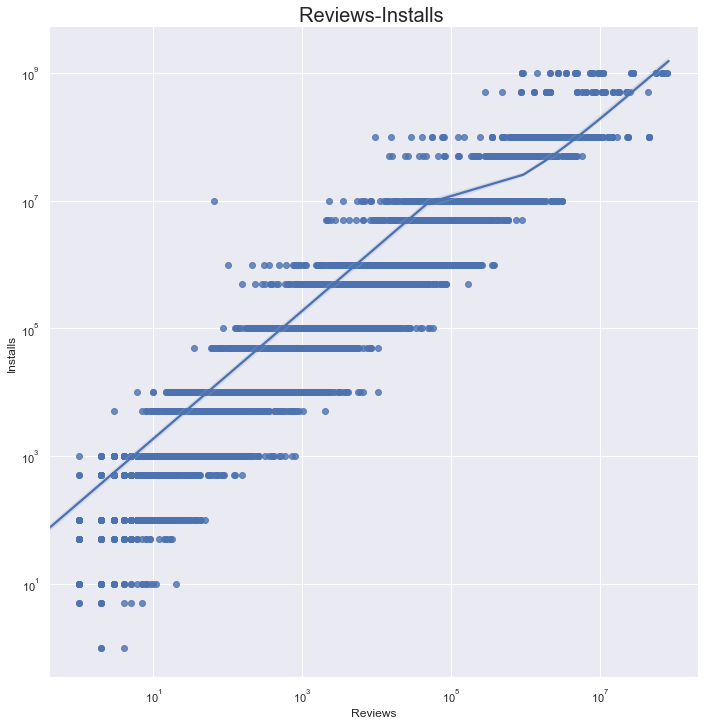

In [136]:
# What is the correlation between Installs and Reviews?
#x_values = googlestore["Reviews"]
#y_values = googlestore["Installs"]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#lin_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(lin_eq,(6,10),fontsize=15,color="orange")
#plt.xlabel('Reviews')
#plt.ylabel('Installs')
#googlestore.plot(kind="scatter", y="Installs", x="Reviews", grid=True, figsize=(10,10), title="Installs VS Reviews")
g = sns.lmplot(y="Installs", x="Reviews", data=googlestore, size=(10))
plt.xscale('log')
plt.yscale('log')
plt.title('Reviews-Installs ', size = 20)

In [137]:
installs = googlestore.iloc[:,5]
reviews = googlestore.iloc[:,3]
correlation = st.pearsonr(installs,reviews)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.64


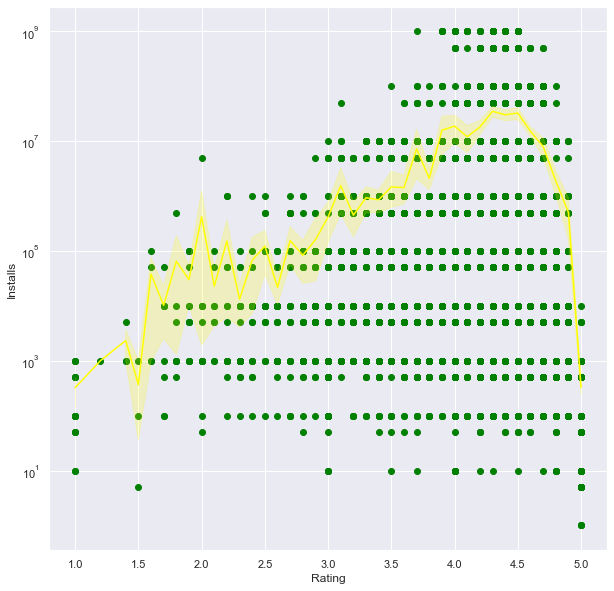

In [138]:
# What is the correlation between the rating and installs?
plt.figure(figsize=(10,10))
plt.scatter(x=googlestore['Rating'], y=googlestore['Installs'], color = 'green')
g = sns.lineplot(x="Rating", y="Installs",color="yellow",data=googlestore)
plt.yscale('log')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.show()

In [139]:
rating = googlestore.iloc[:,2]
correlation = st.pearsonr(installs,rating)
print(f"The correlation between an app's rating and the times it has been installed is {round(correlation[0],2)}")

The correlation between an app's rating and the times it has been installed is 0.05


In [140]:
googlestore['Size'].unique()

array([1.90e+04, 1.40e+04, 8.70e+03, 2.50e+04, 2.80e+03, 5.60e+03,
       2.90e+04, 3.30e+04, 3.10e+03, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 2.70e+03, 5.50e+03, 1.70e+04, 3.90e+04,
       3.10e+04, 4.20e+03, 2.30e+04, 6.00e+03, 6.10e+03, 4.60e+03,
       9.20e+03, 5.20e+03, 1.10e+04, 2.40e+04,      nan, 9.40e+03,
       1.50e+04, 1.00e+04, 1.20e+03, 2.60e+04, 8.00e+03, 7.90e+03,
       5.60e+04, 5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02, 3.60e+03,
       5.70e+03, 8.60e+03, 2.40e+03, 2.70e+04, 2.50e+03, 7.00e+03,
       1.60e+04, 3.40e+03, 8.90e+03, 3.90e+03, 2.90e+03, 3.80e+04,
       3.20e+04, 5.40e+03, 1.80e+04, 1.10e+03, 2.20e+03, 4.50e+03,
       9.80e+03, 5.20e+04, 9.00e+03, 6.70e+03, 3.00e+04, 2.60e+03,
       7.10e+03, 2.20e+04, 6.40e+03, 3.20e+03, 8.20e+03, 4.90e+03,
       9.50e+03, 5.00e+03, 5.90e+03, 1.30e+04, 7.30e+04, 6.80e+03,
       3.50e+03, 4.00e+03, 2.30e+03, 2.10e+03, 4.20e+04, 9.10e+03,
       5.50e+04, 2.30e+01, 7.30e+03, 6.50e+03, 1.50e+03, 7.50e

Text(0.5, 1.0, 'Installs-Size(kilobyte) ')

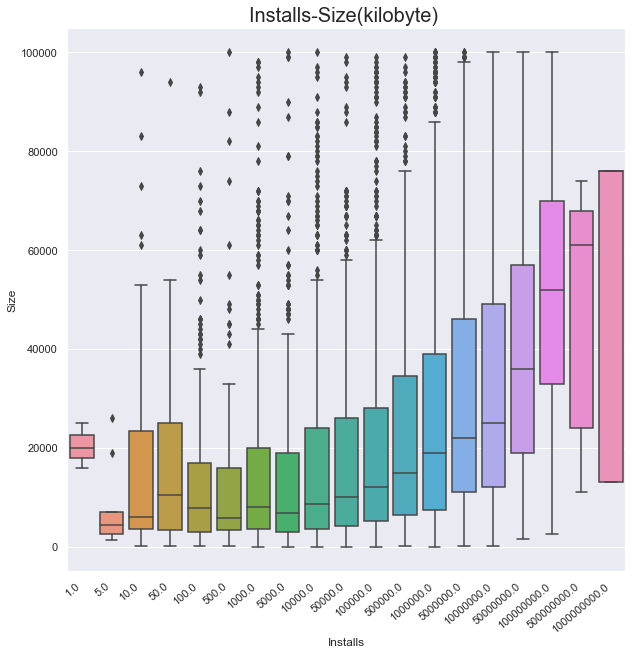

In [141]:
plt.figure(figsize=(10,10))
g = sns.boxplot(x="Installs", y="Size", data=googlestore)
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
plt.title('Installs-Size(kilobyte) ', size = 20)

In [145]:
googlestore['Size'] = googlestore['Size'].replace("nan", "0")
size = googlestore.iloc[:,4]
correlation = st.pearsonr(installs,size)
print(f"The correlation between the size of the app and the number of installs is {round(correlation[0],2)}")

ValueError: array must not contain infs or NaNs